In [115]:
import pmdarima as pm
from pmdarima.arima import ADFTest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math as math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [124]:
# reading the data
df = pd.read_csv('./data/Stock_Price_BRL 2016-2021.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
data = df.sort_index(ascending=True, axis=0)

data.head()

C:\Users\I514609\AppData\Local\Temp\ipykernel_28260\1668925969.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('./data/Stock_Price_BRL 2016-2021.csv',header=0, index_col=0, parse_dates=True, squeeze=True)


,Close_Stock(EUR),Close_EUR,Close_Stock(BRL)
Date,,,
2016-01-04,70.580002,4.2891,302.724687
2016-01-05,71.430000,4.3710,312.220530
2016-01-06,72.050003,4.3301,311.983718
2016-01-07,71.339996,4.3322,309.059131
2016-01-08,71.050003,4.4145,313.650238


In [119]:
train = data[:760]
valid = data[759:]

In [125]:
training = train['Close_Stock(BRL)']
validation = valid['Close_Stock(BRL)']

model = pm.auto_arima(training, start_p=0, start_q=0,max_p=5, max_d=5, max_q=5, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)
model.fit(training)

forecast = model.predict(n_periods=760)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

print(forecast.head())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5215.384, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4984.922, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5198.563, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4904.528, Time=0.70 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.12 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4910.604, Time=0.56 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4905.893, Time=1.10 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4906.311, Time=1.14 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4905.176, Time=0.67 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=4904.769, Time=1.62 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=4906.527, Time=3.05 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  760
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2448.264
Date:                            Mon, 07 Feb 2022   AIC                           4904.528
Time:                                    18:24:39   BIC                           4922.992
Sample:                                         0   HQIC                          4911.644
                                            - 760                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1047      0.031     -3.330      0.001      -0.166      -0.043
ar.S.L12      -0.6748      0.030    -22.659      0.000      -0.733      -0.616
ar.S.L24      -0.3327      0.028    -11.975      0.000      -0.387      -0.278
sigma2        40.7927      1.380     29.554      0.000      38.087      43.498
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               302.63
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.49   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
df_final = pd.DataFrame(data[759:])
df_forecast = pd.DataFrame(forecast)

print(df_final.head())
print(df_forecast.head())

            Close_Stock(EUR)  Close_EUR  Close_Stock(BRL)
Date                                                     
2018-12-28         86.930000     4.4230        384.491390
2019-01-02         87.010002     4.4472        386.950881
2019-01-03         84.309998     4.2853        361.293634
2019-01-04         86.440002     4.2756        369.582873
2019-01-07         86.620003     4.2300        366.402613
            Prediction
Date                  
2018-12-28  386.176453
2019-01-02  393.109288
2019-01-03  392.487240
2019-01-04  397.677930
2019-01-07  386.883694


In [128]:
df_result = df_final.join(df_forecast)
print(df_result)

            Close_Stock(EUR)  Close_EUR  Close_Stock(BRL)  Prediction
Date                                                                 
2018-12-28         86.930000     4.4230        384.491390  386.176453
2019-01-02         87.010002     4.4472        386.950881  393.109288
2019-01-03         84.309998     4.2853        361.293634  392.487240
2019-01-04         86.440002     4.2756        369.582873  397.677930
2019-01-07         86.620003     4.2300        366.402613  386.883694
...                      ...        ...               ...         ...
2021-12-23        123.519997     6.4351        794.863533  241.016449
2021-12-27        124.139999     6.4198        796.953966  242.876507
2021-12-28        124.879997     6.3693        795.398165  249.167216
2021-12-29        123.559998     6.3644        786.385251  249.913684
2021-12-30        124.900002     6.4745        808.665063  253.387291

[760 rows x 4 columns]


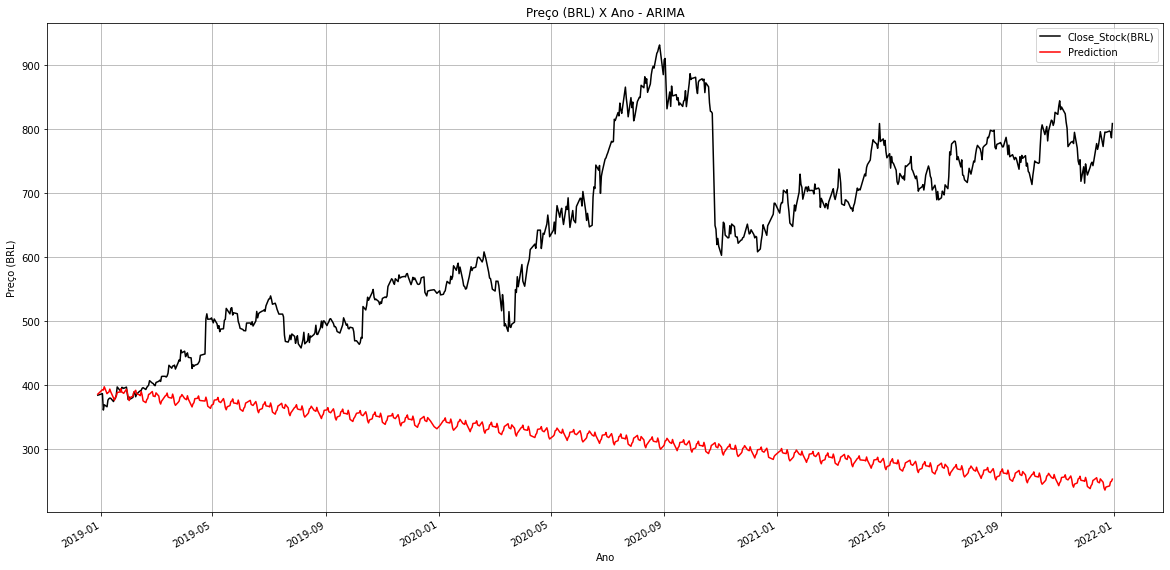

In [129]:
plt.figure(figsize = (20,10))
df_result["Close_Stock(BRL)"][:760].plot(color = 'k', label= 'Close_Stock(BRL)')
df_result['Prediction'].plot(color = 'r', label= 'Prediction') 

plt.ylabel('Preço (BRL)')
plt.xlabel('Ano')
plt.title('Preço (BRL) X Ano - ARIMA')
plt.legend()
plt.grid()
plt.show()

In [133]:
mse = mean_squared_error(df_result['Close_Stock(BRL)'], df_result['Prediction'])
rmse = math.sqrt(mse)
mape = mean_absolute_error(df_result['Close_Stock(BRL)'], df_result['Prediction'])
r2 = r2_score(df_result['Close_Stock(BRL)'], df_result['Prediction'])


print(mse)
print(rmse)
print(mape)
print(r2)

134441.75038862563
366.6629929357824
321.8815913796553
-5.853930933205693
